In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [2]:
data=pd.read_excel("data/Employee burnout Analysis/employee_burnout_analysis-AI 2.xlsx")
data.head(2)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36


In [3]:
data['Company Type'].unique()

array(['Service', 'Product'], dtype=object)

In [4]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [5]:
data.shape

(22750, 9)

In [6]:
data.isnull().sum().values.sum()

np.int64(4622)

In [7]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [8]:
data.columns.to_list()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [9]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [11]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

In [12]:
data=data.dropna()

In [13]:
data.shape

(18590, 9)

In [14]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [15]:
data=data.drop('Employee ID',axis=1)

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

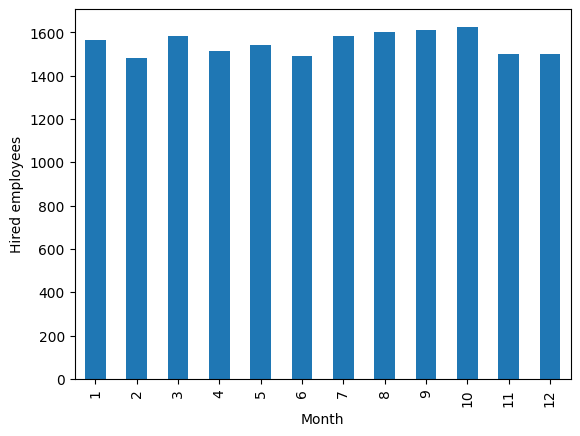

In [16]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month=data.copy()
data_month["Date of Joining"]=data_month['Date of Joining'].astype("datetime64[ns]")
data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(kind="bar",xlabel="Month",ylabel="Hired employees")


In [17]:
data_2008=pd.to_datetime(["2008-01-01"]*len(data))
data["Days"]=data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [18]:
numeric_data=data.select_dtypes(include=['number'])
correlation=numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [19]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

In [20]:
data=data.drop(['Date of Joining','Days'],axis=1)
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


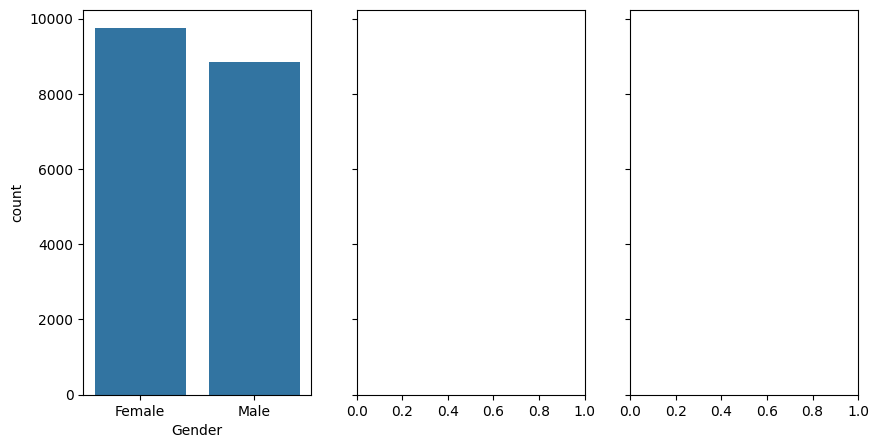

In [21]:
cat_columns=data.select_dtypes(object).columns
fig,ax=plt.subplots(nrows=1,ncols=len(cat_columns),sharey=True,figsize=(10,5))
for i,c in enumerate(cat_columns):
    sns.countplot(x=c,data=data,ax=ax[i])
    plt.show()

In [22]:
# check if colums exist before applying dummies
if all(col in data.columns for col in ['Company Type','WFH Setup Available','Gender']):
    data=pd.get_dummies(data,columns=['Company Type','WFH Setup Available','Gender'],drop_first=True)
    data.head()
    encoded_columns=data.columns
else:
    print("Error: one or more of the specified columns are not present in dataframe")
    print(data.columns)

In [25]:
# split  data into x and y
y=data['Burn Rate']
X=data.drop('Burn Rate',axis=1)
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,shuffle=True,random_state=1)
# Scale X
scalar =StandardScaler()
scalar.fit(X_train)
X_train=pd.DataFrame(scalar.transform(X_train),index=X_train.index,columns=X_train.columns)
X_test=pd.DataFrame(scalar.transform(X_test),index=X_test.index,columns=X_test.columns)

In [26]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [27]:
# linear regression
# create an instance of linearReagression class
linear_regression_model=LinearRegression()
# train the model
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [29]:
# linear regression model performance metrics
print("Linear Regression Model Performance Metrics:\n")
# make predictions on test set
y_pred=linear_regression_model.predict(X_test)
# calculate mean squared error
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error:",mse)
# calculate  root mean squared error
rmse=mean_squared_error(y_test,y_pred,squared=False)
print("Root Mean Squared Error:",rmse)
# calculate mean absolute error
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)
# calculate R-squared score
r2=r2_score(y_test,y_pred)
print("R squared Score:",r2)


Linear Regression Model Performance Metrics:

Mean squared error: 0.003156977911361073
Root Mean Squared Error: 0.056186990588223115
Mean Absolute Error: 0.04595032032644773
R squared Score: 0.918822674247248


C:\Users\91951\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
